In [345]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as plb


In [346]:
print(os.getcwd())

/Users/miriamcorona/Desktop/cap_proj


In [320]:
df = pd.read_csv('cap_output2.csv')

In [567]:
table = pd.pivot_table(df, values='PayMonth', index=['Category_of_Aid'], aggfunc=np.sum)
table1 = pd.pivot_table(df, values='PayMonth', index=['Category_of_Aid'], aggfunc=np.mean)

In [568]:
print(table)
print(table1)

                    PayMonth
Category_of_Aid             
Adult                   2241
BCCTP                  10565
Child                    708
LTC                    14767
LTC/Full-Dual          10646
Maternity             113584
OBRA                      85
Optional Expansion      3147
SPD                     7648
SPD/Full-Dual           1322
                      PayMonth
Category_of_Aid               
Adult                21.342857
BCCTP               100.619048
Child                 6.742857
LTC                 671.227273
LTC/Full-Dual       483.909091
Maternity           684.240964
OBRA                 28.333333
Optional Expansion   29.971429
SPD                  72.838095
SPD/Full-Dual        12.590476


In [326]:
print(table.reindex(table['PayMonth'].sort_values(ascending=False).index))


                    PayMonth
Category_of_Aid             
Maternity             113584
LTC                    14767
LTC/Full-Dual          10646
BCCTP                  10565
SPD                     7648
Optional Expansion      3147
Adult                   2241
SPD/Full-Dual           1322
Child                    708
OBRA                      85


In [332]:
results = df.groupby(['Health_Plan', 'Category_of_Aid']).mean()
print(results)

                                        Unnamed: 0  Unnamed:_0        LB  \
Health_Plan         Category_of_Aid                                        
Aetna Better Health Adult                     24.0        24.0   246.050   
                    BCCTP                     25.0        25.0  1162.125   
                    Child                     26.0        26.0    77.835   
                    Maternity                 28.0        28.0  7468.915   
                    Optional Expansion        28.0        28.0   352.045   
...                                            ...         ...       ...   
UnitedHealthcare    Child                     98.0        98.0    85.100   
                    Maternity                100.0       100.0  6349.930   
                    Optional Expansion       100.0       100.0   372.640   
                    SPD                      102.0       102.0   824.990   
                    SPD/Full-Dual            103.0       103.0   112.290   

           

In [338]:
#pvcm = pd.pivot_table(df,index=["Category_of_Aid","Model"], values=['PayMonth'], aggfunc=[np.mean],fill_value=0,margins=True,dropna=True)
pvcm = df.pivot_table(index=["Category_of_Aid","Model"],aggfunc='mean')[['PayMonth']]

result = pvcm.reset_index().sort_values(['Category_of_Aid','PayMonth'], ascending=[1,0]).set_index(['Category_of_Aid','Model'])

print(result)

                                               PayMonth
Category_of_Aid    Model                               
Adult              COHS                       26.428571
                   Regional Rural Expansion   21.440000
                   GMC                        20.923077
                   Two Plan                   18.821429
BCCTP              COHS                      108.000000
                   Regional Rural Expansion  102.220000
                   GMC                        98.000000
                   Two Plan                   95.285714
Child              COHS                        8.428571
                   GMC                         6.769231
                   Two Plan                    6.642857
                   Regional Rural Expansion    6.320000
LTC                COHS                      706.785714
                   Regional Rural Expansion  609.000000
LTC/Full-Dual      Regional Rural Expansion  503.000000
                   COHS                      473

In [339]:
#pd.pivot_table(df,index=["Model","Category_of_Aid"], values=['PayMonth'], aggfunc=[np.mean],fill_value=0,margins=True,dropna=True)
pvcm2 = df.pivot_table(index=["Model","Category_of_Aid"],aggfunc='mean')[['PayMonth']]
#result2 = pvcm2.sort_values(('PayMonth'), ascending=False)
result2 = pvcm.reset_index().sort_values(['Model','PayMonth'], ascending=[1,0]).set_index(['Model','Category_of_Aid'])

print(result2)



                                               PayMonth
Model                    Category_of_Aid               
COHS                     LTC                 706.785714
                         LTC/Full-Dual       473.000000
                         BCCTP               108.000000
                         SPD                  81.714286
                         Optional Expansion   34.571429
                         OBRA                 28.333333
                         Adult                26.428571
                         SPD/Full-Dual        18.571429
                         Child                 8.428571
GMC                      Maternity           630.384615
                         BCCTP                98.000000
                         SPD                  65.307692
                         Optional Expansion   30.307692
                         Adult                20.923077
                         SPD/Full-Dual        11.000000
                         Child                 6

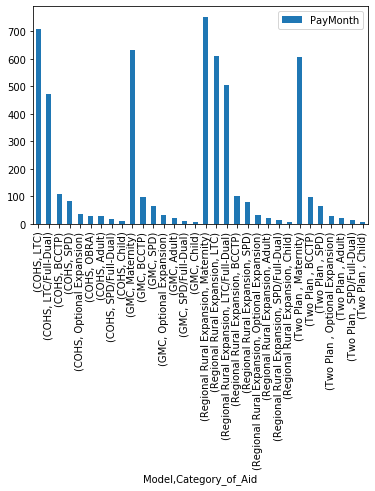

In [341]:
result2.plot(kind='bar')

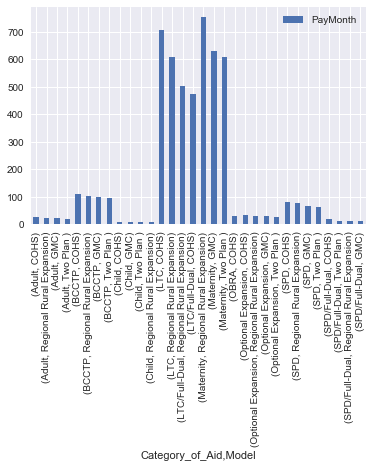

In [526]:
#pd.pivot_table(df,index=["Model","Category_of_Aid"], values=['PayMonth'], aggfunc=[np.mean],fill_value=0,margins=True,dropna=True)
pvcm2 = df.pivot_table(index=["Category_of_Aid","Model"],aggfunc='mean')[['PayMonth']]
#result2 = pvcm2.sort_values(('PayMonth'), ascending=False)
result3 = pvcm.reset_index().sort_values(['Category_of_Aid','PayMonth'], ascending=[1,0]).set_index(['Category_of_Aid','Model'])

result3.plot(kind='bar')


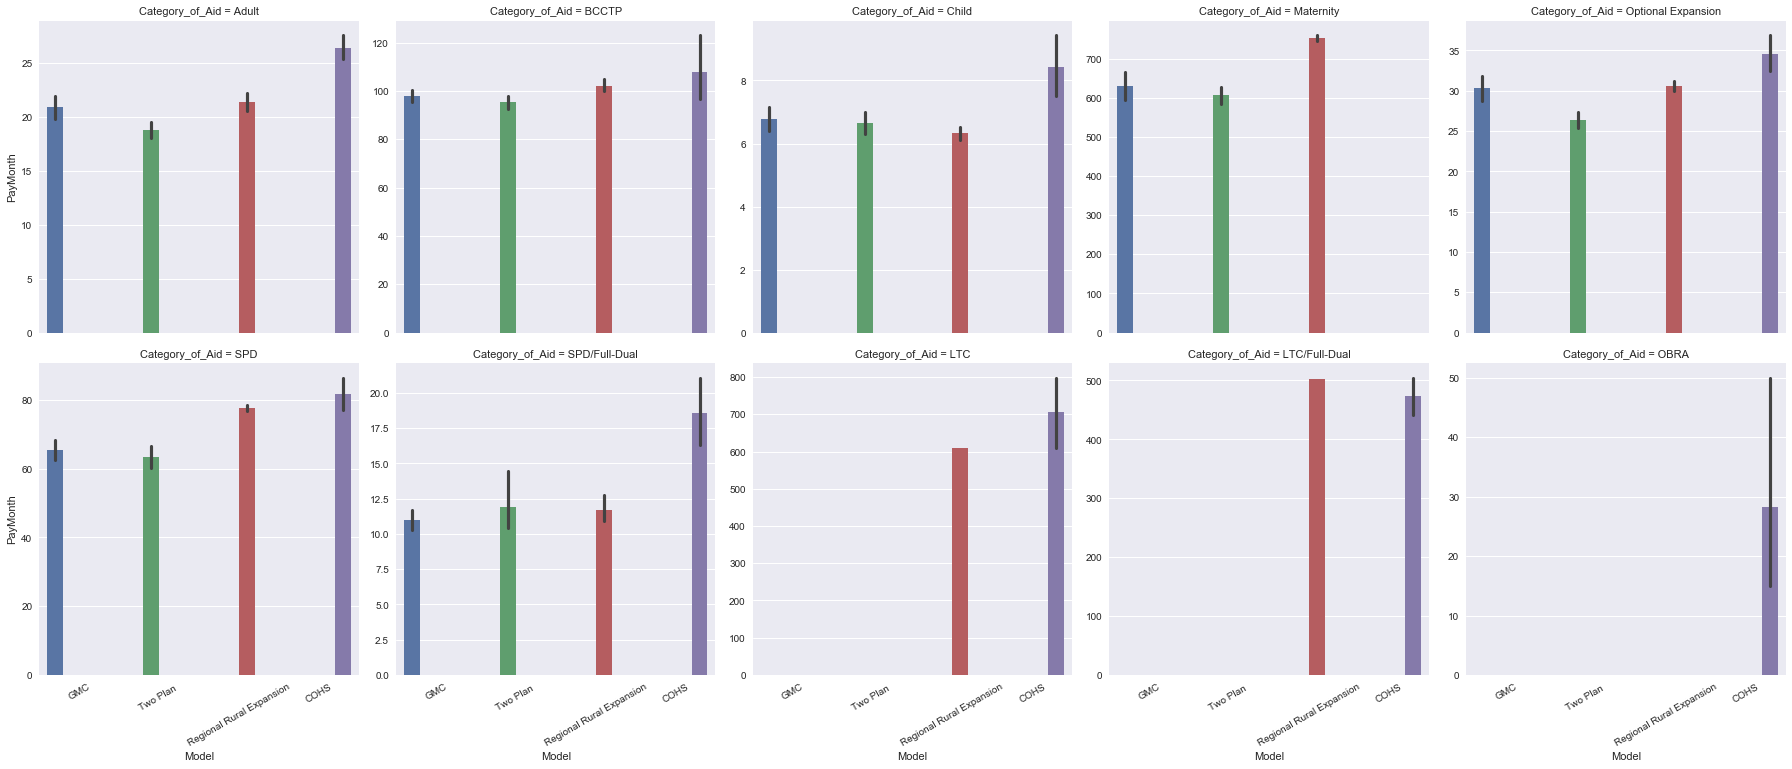

In [489]:
import seaborn as sns
dp = sns.catplot(x='Model', y='PayMonth', sharex=True, sharey=False, hue='Model', 
               col='Category_of_Aid', data=df, kind='bar', col_wrap=5)
dp.set_xticklabels(rotation=30)

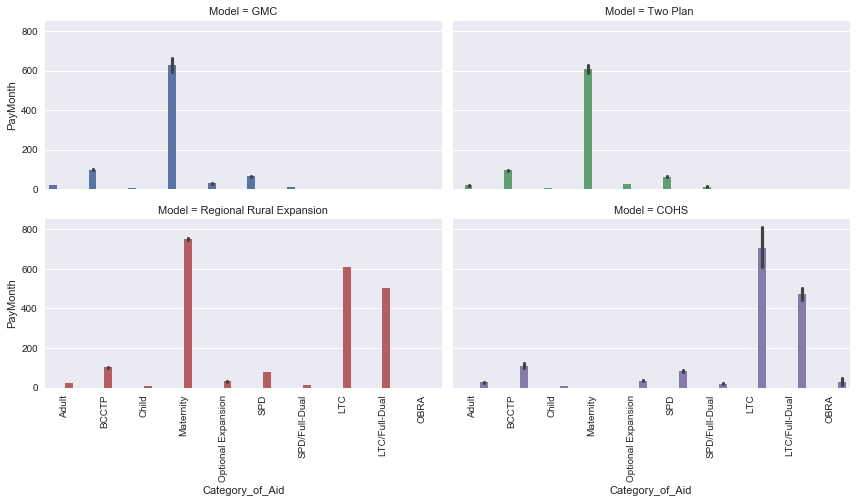

In [503]:
dp1 = sns.catplot(x='Category_of_Aid', y='PayMonth', hue='Model', 
               col='Model', data=df, kind='bar', col_wrap=2,facet_kws={'sharey':True, 'sharex':True},height=3, aspect=2)
#for ax in dp1.axes.flat:
for label in ax.get_yticklabels():
    label.set_rotation(45)

dp1.set_xticklabels(rotation=90)


In [419]:
df.columns

Index(['Unnamed: 0', 'Unnamed:_0', 'State_Fiscal_Year', 'Model', 'County',
       'Health_Plan', 'Category_of_Aid', 'LB', 'Midpoint', 'UB', 'Average',
       'Start_Month', 'End_Month', 'TMonths', 'Pay_Month', 'PayMonth', 'q1',
       'q2', 'q3', 'q4'],
      dtype='object')

In [420]:
paymonth = df['PayMonth']
cof = df['Category_of_Aid']
mod = df['Model']

<BarContainer object of 843 artists>

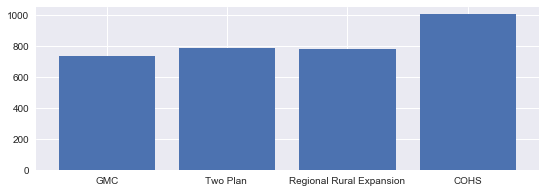

In [436]:

plt.figure(figsize=(9, 3))

plt.subplot()
plt.bar(mod, paymonth)


In [438]:
df.groupby(['Category_of_Aid']).mean()

,Unnamed: 0,Unnamed:_0,LB,Midpoint,UB,Average,TMonths,Pay_Month,PayMonth,q1,q2,q3,q4
Category_of_Aid,,,,,,,,,,,,,
Adult,419.076190,419.076190,248.555810,256.535143,264.801143,256.630698,10.828571,21.385892,21.342857,64.157675,128.315349,192.473024,256.630698
BCCTP,421.828571,421.828571,1173.378952,1208.056000,1243.841333,1208.425429,10.828571,100.702119,100.619048,302.106357,604.212714,906.319071,1208.425429
Child,418.447619,418.447619,76.771238,79.812667,82.995143,79.859683,10.828571,6.654974,6.742857,19.964921,39.929841,59.894762,79.859683
LTC,763.500000,763.500000,7909.923182,8056.102273,8202.284091,8056.103182,11.000000,671.341932,671.227273,2014.025795,4028.051591,6042.077386,8056.103182
LTC/Full-Dual,764.500000,764.500000,5710.764091,5804.091818,5897.416364,5804.090758,11.000000,483.674230,483.909091,1451.022690,2902.045379,4353.068068,5804.090758
Maternity,333.686747,333.686747,7980.346627,8205.328193,8438.431807,8208.035542,10.783133,684.002962,684.240964,2052.008886,4104.017771,6156.026657,8208.035542
OBRA,824.000000,824.000000,330.223333,339.873333,349.520000,339.872222,11.000000,28.322685,28.333333,84.968056,169.936111,254.904167,339.872222
Optional Expansion,424.371429,424.371429,348.549905,360.140952,372.271524,360.320794,10.828571,30.026733,29.971429,90.080198,180.160397,270.240595,360.320794
SPD,420.695238,420.695238,849.185429,873.551048,898.684190,873.806889,10.828571,72.817241,72.838095,218.451722,436.903444,655.355167,873.806889


In [439]:
df.groupby(['Model']).mean()

,Unnamed: 0,Unnamed:_0,LB,Midpoint,UB,Average,TMonths,Pay_Month,PayMonth,q1,q2,q3,q4
Model,,,,,,,,,,,,,
COHS,798.80,798.80,2097.045217,2138.235304,2179.501304,2138.260609,11.000000,178.188384,178.173913,534.565152,1069.130304,1603.695457,2138.260609
GMC,51.50,51.50,2175.162981,2237.947981,2303.090385,2238.733782,9.615385,186.561149,186.634615,559.683445,1119.366891,1679.050337,2238.733782
Regional Rural Expansion,528.08,528.08,2470.302125,2537.989975,2607.964850,2538.752317,11.000000,211.562693,211.627500,634.688079,1269.376158,1904.064237,2538.752317
Two Plan,215.50,215.50,2090.835759,2150.513884,2212.417009,2151.255551,11.000000,179.271296,179.294643,537.813888,1075.627775,1613.441663,2151.255551


In [440]:
df.groupby(['County']).mean()

,Unnamed: 0,Unnamed:_0,LB,Midpoint,UB,Average,TMonths,Pay_Month,PayMonth,q1,q2,q3,q4
County,,,,,,,,,,,,,
Alameda,111.500000,111.500000,2325.201875,2391.535625,2460.344375,2392.360625,11.000000,199.363385,199.375000,598.090156,1196.180312,1794.270469,2392.360625
Alpine,407.500000,407.500000,2569.890000,2643.266250,2719.376875,2644.177708,11.000000,220.348142,220.437500,661.044427,1322.088854,1983.133281,2644.177708
Amador,488.833333,488.833333,2565.467500,2638.625000,2714.503333,2639.531944,11.000000,219.960995,220.041667,659.882986,1319.765972,1979.648958,2639.531944
Butte,423.500000,423.500000,2569.890000,2643.266250,2719.376875,2644.177708,11.000000,220.348142,220.437500,661.044427,1322.088854,1983.133281,2644.177708
Calaveras,431.500000,431.500000,2569.890000,2643.266250,2719.376875,2644.177708,11.000000,220.348142,220.437500,661.044427,1322.088854,1983.133281,2644.177708
Colusa,439.500000,439.500000,2569.890000,2643.266250,2719.376875,2644.177708,11.000000,220.348142,220.437500,661.044427,1322.088854,1983.133281,2644.177708
Contra Costa,127.500000,127.500000,2385.635000,2453.642500,2524.175625,2454.484375,11.000000,204.540365,204.625000,613.621094,1227.242187,1840.863281,2454.484375
DelNorte,667.625000,667.625000,2060.918750,2102.188750,2143.535000,2102.214167,11.000000,175.184514,175.125000,525.553542,1051.107083,1576.660625,2102.214167
El Dorado,512.833333,512.833333,2565.467500,2638.625000,2714.503333,2639.531944,11.000000,219.960995,220.041667,659.882986,1319.765972,1979.648958,2639.531944


In [461]:
modgr = df.groupby(['Model','Category_of_Aid']).mean()['PayMonth']
modgr

Model                     Category_of_Aid   
COHS                      Adult                  26.428571
                          BCCTP                 108.000000
                          Child                   8.428571
                          LTC                   706.785714
                          LTC/Full-Dual         473.000000
                          OBRA                   28.333333
                          Optional Expansion     34.571429
                          SPD                    81.714286
                          SPD/Full-Dual          18.571429
GMC                       Adult                  20.923077
                          BCCTP                  98.000000
                          Child                   6.769231
                          Maternity             630.384615
                          Optional Expansion     30.307692
                          SPD                    65.307692
                          SPD/Full-Dual          11.000000
Regional Ru

In [528]:
%matplotlib inline

df.groupby(['Category_of_Aid','Model']).mean()['PayMonth']

Category_of_Aid     Model                   
Adult               COHS                         26.428571
                    GMC                          20.923077
                    Regional Rural Expansion     21.440000
                    Two Plan                     18.821429
BCCTP               COHS                        108.000000
                    GMC                          98.000000
                    Regional Rural Expansion    102.220000
                    Two Plan                     95.285714
Child               COHS                          8.428571
                    GMC                           6.769231
                    Regional Rural Expansion      6.320000
                    Two Plan                      6.642857
LTC                 COHS                        706.785714
                    Regional Rural Expansion    609.000000
LTC/Full-Dual       COHS                        473.000000
                    Regional Rural Expansion    503.000000
Maternity  

modgr.plot()

In [532]:

data3 = df[['Model','Category_of_Aid', 'PayMonth']]
data3

,Model,Category_of_Aid,PayMonth
0,GMC,Adult,20
1,GMC,BCCTP,97
2,GMC,Child,6
3,GMC,Maternity,735
4,GMC,Optional Expansion,28
...,...,...,...
838,COHS,BCCTP,91
839,COHS,LTC,527
840,COHS,LTC/Full-Dual,473
841,COHS,OBRA,20


In [538]:
GMC = data3['Model']=='GMC'
gmc = data3[GMC]
gmc
COHS= data3['Model']=='COHS'
cohs = data3[COHS]
cohs
TWO_PLAN= data3['Model']=='Two Plan'
two_plan = data3[TWO_PLAN]
two_plan
REG = data3['Model']=='Regional Rural Expansion'
reg = data3[REG]
reg

,Model,Category_of_Aid,PayMonth
328,Regional Rural Expansion,Child,6
329,Regional Rural Expansion,Adult,20
330,Regional Rural Expansion,SPD,77
331,Regional Rural Expansion,SPD/Full-Dual,10
332,Regional Rural Expansion,BCCTP,99
...,...,...,...
723,Regional Rural Expansion,SPD/Full-Dual,14
724,Regional Rural Expansion,BCCTP,122
725,Regional Rural Expansion,LTC,609
726,Regional Rural Expansion,LTC/Full-Dual,503


TypeError: barplot() got multiple values for argument 'x'

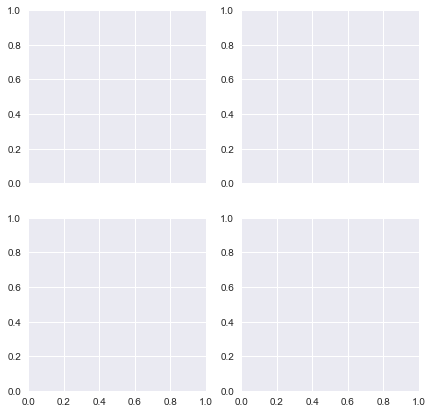

In [546]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

gmcbar = sns.barplot(x="Category_of_Aid", y="PayMonth", data=gmc,ax=axes[0, 0])
cohsbar = sns.barplot(x="Category_of_Aid", y="PayMonth", data=cohs,ax=axes[0, 1])
two_planbar = sns.barplot(x="Category_of_Aid", y="PayMonth", data=two_plan.ax=axes[1, 0])
regbar = sns.barplot(x="Category_of_Aid", y="PayMonth", data=reg,ax=axes[1, 1])




/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


''

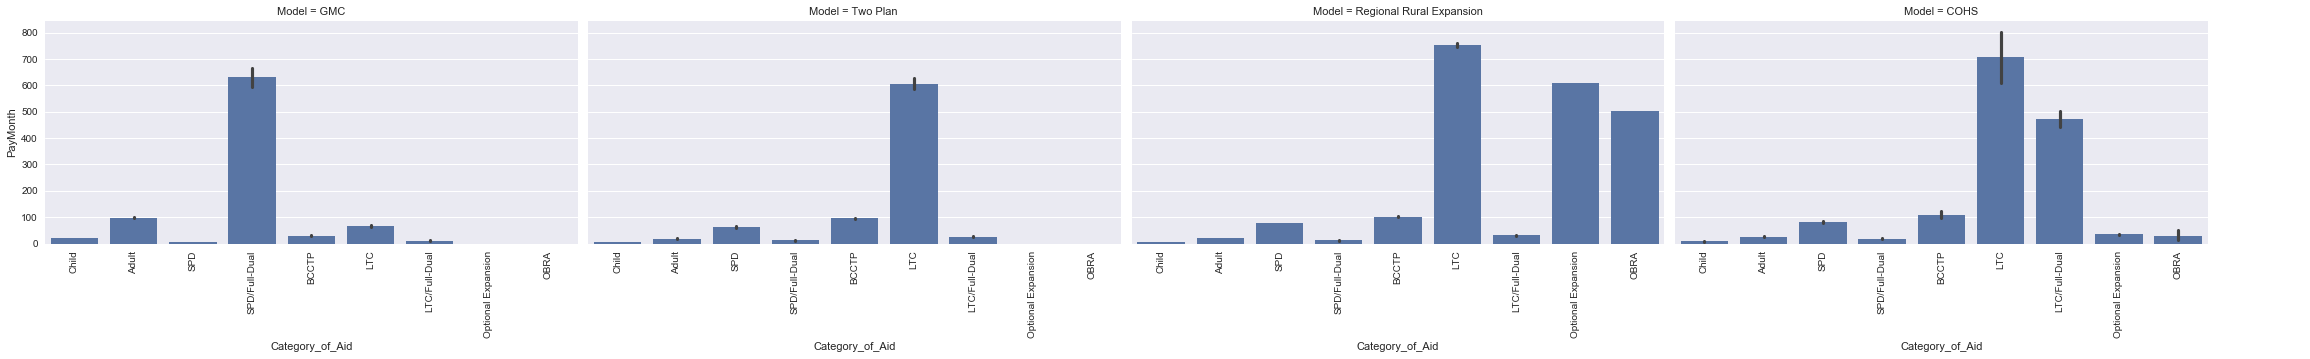

In [561]:
g = sns.FacetGrid(df, col="Model", height=4, aspect=2, margin_titles=True)
g.map(sns.barplot, "Category_of_Aid", "PayMonth")
g.add_legend()

g.set_xticklabels(rotation=90)
;


In [566]:
def func(group):
    return group.loc[group['PayMonth'] == group['PayMonth'].max()]

data3.groupby('Category_of_Aid', as_index=False).apply(func).reset_index(drop=True)


,Model,Category_of_Aid,PayMonth
0,COHS,Adult,30
1,COHS,Adult,30
2,COHS,BCCTP,191
3,COHS,Child,12
4,COHS,LTC,1002
5,COHS,LTC/Full-Dual,578
6,Two Plan,Maternity,785
7,Two Plan,Maternity,785
8,Two Plan,Maternity,785
9,Two Plan,Maternity,785


In [573]:
cohs